In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [4]:
df_ori = pd.read_excel("datasetoriginal.xlsx")
df_ori

,Comp. New No.,Molecule ChEMBL ID,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,IC50,IC50units,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,1,CHEMBL298388,0,416.52,0,2.24,1a,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,13.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL1127970,1.0,Scientific Literature,Bioorg. Med. Chem. Lett.,1994.0,NaN
1,2,CHEMBL163635,0,400.43,0,0.44,6c,O=C(O)[C@@H](O)CNC(=O)[C@H](Cc1ccccc1)N[C@@H](...,1000.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL1124671,1.0,Scientific Literature,J. Med. Chem.,1989.0,NaN
2,3,CHEMBL164625,0,398.46,0,1.86,6b,O=C(O)CCNC(=O)[C@H](Cc1ccccc1)N[C@@H](CCc1cccc...,1000.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL1124671,1.0,Scientific Literature,J. Med. Chem.,1989.0,NaN
3,4,CHEMBL337878,0,403.54,0,4.06,12e,CC(C)(C)OC(=O)[C@@H]1CCCN1C(=O)[C@@H]1CCC[C@@H...,250000.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL1123522,1.0,Scientific Literature,J. Med. Chem.,1986.0,NaN
4,5,CHEMBL110375,0,231.27,0,0.15,20b,CC(CS)C(=O)N1C(=O)CCC1C(=O)O,9.3,nM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,CHEMBL337871,0,271.38,0,1.80,14g,CC1(C)CC[C@@H](C(=O)N2CCC[C@H]2C(=O)O)[C@@H]1S,215000.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL1123522,1.0,Scientific Literature,J. Med. Chem.,1986.0,NaN
251,252,CHEMBL4090635,0,620.67,1,2.77,6d,CCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1C[C...,2800.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL4020733,1.0,Scientific Literature,Bioorg Med Chem Lett,2017.0,NaN
252,253,CHEMBL4067185,0,578.59,1,1.60,6a,C[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1C[C@@H...,334.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL4020733,1.0,Scientific Literature,Bioorg Med Chem Lett,2017.0,NaN
253,254,CHEMBL4078112,0,606.64,1,2.38,6c,CCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1C[C@...,893.0,nM,...,CHEMBL2625,Angiotensin-converting enzyme,Rattus norvegicus,SINGLE PROTEIN,CHEMBL4020733,1.0,Scientific Literature,Bioorg Med Chem Lett,2017.0,NaN


In [5]:
#Load Dataset
df = pd.read_csv("data_converted.csv")
df

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,AUTOGEN_TA_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AUTOGEN_TA_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AUTOGEN_TA_3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AUTOGEN_TA_4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AUTOGEN_TA_5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,AUTOGEN_TA_251,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,AUTOGEN_TA_252,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,AUTOGEN_TA_253,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,AUTOGEN_TA_254,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_combine = pd.concat([df, df_ori['Pic50']], axis=1)
df_combine

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Pic50
0,AUTOGEN_TA_1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.886057
1,AUTOGEN_TA_2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
2,AUTOGEN_TA_3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
3,AUTOGEN_TA_4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.602060
4,AUTOGEN_TA_5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.031517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,AUTOGEN_TA_251,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.667562
251,AUTOGEN_TA_252,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.552842
252,AUTOGEN_TA_253,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.476254
253,AUTOGEN_TA_254,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.049149


In [7]:
df_combine = df_combine.drop(["Name"],axis=1)
df_combine

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Pic50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.031517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.667562
251,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.552842
252,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.476254
253,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.049149


In [8]:
# Mengecek dan menampilkan total data duplikat dan nilai NaN
print('Total Data Duplikat  : ', df_combine.duplicated().sum().sum())
print('Total Data NaN : ', df_combine.isna().sum().sum())

Total Data Duplikat  :  9
Total Data NaN :  0


In [9]:
df_combine.drop_duplicates(inplace=True)
df_combine.dropna(inplace=True)

print('Total Data Duplikat  : ', df_combine.duplicated().sum().sum())
print('Total Data NaN : ', df_combine.isna().sum().sum())

Total Data Duplikat  :  0
Total Data NaN :  0


In [10]:
num_features = len(df_combine.columns)
print(f'Jumlah fitur: {num_features}')

Jumlah fitur: 882


In [11]:
print(df_combine.info())


<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 254
Columns: 882 entries, PubchemFP0 to Pic50
dtypes: float64(1), int64(881)
memory usage: 1.7 MB
None


In [12]:
df_combine.to_csv("Combined_data.csv", index=False)

In [13]:
# Spliting
data_train, data_test = train_test_split(df_combine, test_size=0.2, random_state=42)


print("Training set shape:", data_train.shape)
print("Testing set shape:", data_test.shape)

Training set shape: (196, 882)
Testing set shape: (50, 882)


In [14]:
data_train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Pic50
160,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
244,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.481486
123,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.455932
204,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.154902
248,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.396374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.823909
14,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
96,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.602060
187,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.397940


In [15]:
data_test

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Pic50
33,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
6,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.552842
189,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.481486
90,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.376751
161,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.251812
186,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
203,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.769551
109,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.939302
242,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.346787


In [16]:
print("Duplicated in train data:", data_train.duplicated().sum())
print("NaN in train data:", data_train.isna().sum().sum())
print("Duplicated in test data:", data_test.duplicated().sum())
print("NaN in test data:", data_test.isna().sum().sum())

Duplicated in train data: 0
NaN in train data: 0
Duplicated in test data: 0
NaN in test data: 0


In [17]:
data_train.duplicated().sum().sum()
data_train.isna().sum().sum()

0

In [18]:
data_test.duplicated().sum().sum()
data_test.isna().sum().sum()

0

In [19]:
# Save to CSV
data_train.to_csv("Train.csv",index=False)
data_test.to_csv("Test.csv",index=False)

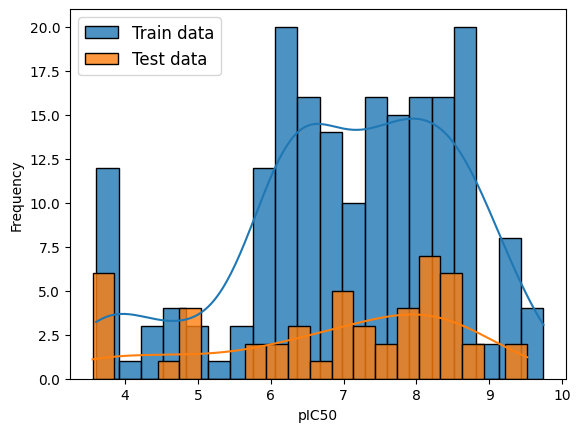

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for training data
sns.histplot(data=data_train, x='Pic50', color='#1f77b4', kde=True, label='Train data', alpha=0.8, bins=20)  # Biru cerah

# Plot histogram for testing data
sns.histplot(data=data_test, x='Pic50', color='#ff7f0e', kde=True, label='Test data', alpha=0.8, bins=20)  # Oranye cerah

# Add labels and a title
plt.xlabel('pIC50')
plt.ylabel('Frequency')

# Add legend
plt.legend(fontsize=12)

# Save the plot
plt.savefig('distribution_train_test_custom.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

# Replace 'target' with the actual column name for the target variable
train_target_counts = train_data['Pic50'].value_counts(normalize=True).sort_values(ascending=False)
test_target_counts = test_data['Pic50'].value_counts(normalize=True).sort_values(ascending=False)

# Select top 10 classes (adjust this number as needed)
top_classes = train_target_counts.head(10).index.union(test_target_counts.head(10).index)

# Filter only top classes and group the rest as "Other"
train_target_filtered = train_data['Pic50'].apply(lambda x: x if x in top_classes else 'Other')
test_target_filtered = test_data['Pic50'].apply(lambda x: x if x in top_classes else 'Other')

# Recompute proportions after filtering
train_target_counts = train_target_filtered.value_counts(normalize=True).sort_index()
test_target_counts = test_target_filtered.value_counts(normalize=True).sort_index()

# Combine unique classes (including "Other")
all_classes = train_target_counts.index.union(test_target_counts.index)

# Create aligned counts for Train and Test
train_counts_aligned = [train_target_counts.get(cls, 0) for cls in all_classes]
test_counts_aligned = [test_target_counts.get(cls, 0) for cls in all_classes]

# Define bar positions
bar_width = 0.4
train_positions = range(len(all_classes))  # Adjust positions based on unique classes
test_positions = [x + bar_width for x in train_positions]  # Shift Test bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Train data
ax.bar(train_positions, train_counts_aligned, width=bar_width, color='blue', label='Train')

# Plot Test data
ax.bar(test_positions, test_counts_aligned, width=bar_width, color='orange', label='Test')

# Add labels and title
ax.set_xticks([x + bar_width / 2 for x in train_positions])  # Center the x-ticks
ax.set_xticklabels(all_classes, rotation=45, ha='right')  # Rotate labels
ax.set_xlabel('Target Classes')
ax.set_ylabel('Proportion')
ax.set_title('Target Distribution in Train and Test Data (Top Classes)')

# Add data labels above bars
for i, v in enumerate(train_counts_aligned):
    ax.text(train_positions[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=8)
for i, v in enumerate(test_counts_aligned):
    ax.text(test_positions[i], v + 0.01, f'{v:.2f}', ha='center', fontsize=8)

# Add legend
ax.legend()

# Save and show the plot
plt.tight_layout()
plt.savefig('target_distribution_train_test_fixed.png', dpi=300)
plt.show()


TypeError: '<' not supported between instances of 'float' and 'str'

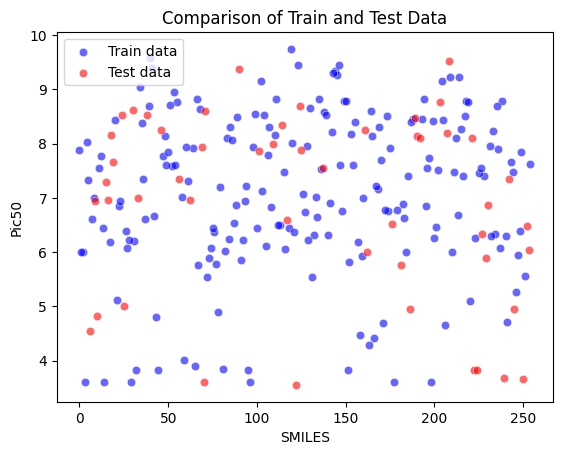

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the train data
sns.scatterplot(x=data_train.index, y=data_train['Pic50'], color='blue', alpha=0.6, label='Train data')

# Plot the test data
sns.scatterplot(x=data_test.index, y=data_test['Pic50'], color='red', alpha=0.6, label='Test data')

# Add labels and a title
plt.xlabel('SMILES')
plt.ylabel('Pic50')
plt.title('Comparison of Train and Test Data')

# Add a legend
plt.legend()

plt.savefig('comparison_train_test.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
